<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#False-false-class" data-toc-modified-id="False-false-class-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>False false class</a></span></li></ul></li></ul></li><li><span><a href="#Decision-Tree-Algorithm" data-toc-modified-id="Decision-Tree-Algorithm-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Decision Tree Algorithm</a></span><ul class="toc-item"><li><span><a href="#Gini-Index" data-toc-modified-id="Gini-Index-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Gini Index</a></span><ul class="toc-item"><li><span><a href="#False-false-class" data-toc-modified-id="False-false-class-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>False false class</a></span></li></ul></li><li><span><a href="#Entropy" data-toc-modified-id="Entropy-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Entropy</a></span><ul class="toc-item"><li><span><a href="#False-false-class" data-toc-modified-id="False-false-class-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>False false class</a></span></li></ul></li></ul></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Random Forest Classifier</a></span><ul class="toc-item"><li><span><a href="#Gini-Index" data-toc-modified-id="Gini-Index-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Gini Index</a></span><ul class="toc-item"><li><span><a href="#False-false-class" data-toc-modified-id="False-false-class-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>False false class</a></span></li></ul></li><li><span><a href="#Entropy" data-toc-modified-id="Entropy-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Entropy</a></span><ul class="toc-item"><li><span><a href="#False-false-class" data-toc-modified-id="False-false-class-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>False false class</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import pydicom
from sklearn.metrics import roc_auc_score
from copy import deepcopy
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Data Preprocessing

In [2]:
ts = pd.read_csv('/Users/rt/Desktop/College/Cancer Project/datasets/TrueSet.csv')
display(ts)

,Patient_id,Slice_id,Angles_Distance,Contrast,Dissimilarities,Homogeneity,ASM,Energy,Correlation,status,Entropy
0,1.0,1.0,0 (d = 1),33.624173,0.254810,0.991273,0.976641,0.988252,0.971235,1.0,0.133671
1,1.0,1.0,45 (d = 1),52.397355,0.335625,0.991312,0.976185,0.988021,0.955348,1.0,0.133671
2,1.0,1.0,90 (d = 1),32.395772,0.246661,0.991358,0.976671,0.988267,0.972286,1.0,0.133671
3,1.0,1.0,135 (d = 1),57.237616,0.354848,0.991172,0.976124,0.987990,0.951223,1.0,0.133671
4,1.0,1.0,0 (d = 2),84.013533,0.476040,0.990650,0.975607,0.987728,0.928407,1.0,0.133671
...,...,...,...,...,...,...,...,...,...,...,...
1315,4.0,58.0,135 (d = 2),74.172211,0.996355,0.979663,0.958999,0.979285,0.663702,1.0,0.279801
1316,4.0,58.0,0 (d = 3),82.000896,1.083436,0.978642,0.956995,0.978261,0.629656,1.0,0.279801
1317,4.0,58.0,45 (d = 3),78.950834,1.052204,0.978875,0.957253,0.978393,0.644799,1.0,0.279801
1318,4.0,58.0,90 (d = 3),83.111228,1.067657,0.978810,0.957206,0.978369,0.624641,1.0,0.279801


In [3]:
ts.drop(columns = ['Patient_id', 'Slice_id', 'Angles_Distance', 'ASM'], inplace = True)
display(ts)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,status,Entropy
0,33.624173,0.254810,0.991273,0.988252,0.971235,1.0,0.133671
1,52.397355,0.335625,0.991312,0.988021,0.955348,1.0,0.133671
2,32.395772,0.246661,0.991358,0.988267,0.972286,1.0,0.133671
3,57.237616,0.354848,0.991172,0.987990,0.951223,1.0,0.133671
4,84.013533,0.476040,0.990650,0.987728,0.928407,1.0,0.133671
...,...,...,...,...,...,...,...
1315,74.172211,0.996355,0.979663,0.979285,0.663702,1.0,0.279801
1316,82.000896,1.083436,0.978642,0.978261,0.629656,1.0,0.279801
1317,78.950834,1.052204,0.978875,0.978393,0.644799,1.0,0.279801
1318,83.111228,1.067657,0.978810,0.978369,0.624641,1.0,0.279801


In [4]:
tts = pd.read_csv('/Users/rt/Desktop/College/Cancer Project/datasets/TrueTrueSet.csv')
display(tts)

,Patient_id,Slice_id,Angles,Distance,Contrast,Dissimilarities,Homogeneity,ASM,Energy,Correlation,status,Entropy
0,1.0,1.0,0.0,1.0,4064.928018,37.291161,0.230484,0.041462,0.203623,0.547081,1.0,6.711178
1,1.0,1.0,45.0,1.0,4440.675110,39.541330,0.230108,0.039953,0.199882,0.506535,1.0,6.711178
2,1.0,1.0,90.0,1.0,4335.002512,39.222794,0.232505,0.041465,0.203630,0.516879,1.0,6.711178
3,1.0,1.0,135.0,1.0,4424.382514,39.475755,0.229090,0.039934,0.199836,0.508345,1.0,6.711178
4,1.0,1.0,0.0,2.0,4347.037755,38.815591,0.228018,0.039246,0.198105,0.516992,1.0,6.711178
...,...,...,...,...,...,...,...,...,...,...,...,...
1315,4.0,58.0,135.0,2.0,4306.086736,40.169719,0.223799,0.039942,0.199855,0.386690,1.0,6.728915
1316,4.0,58.0,0.0,3.0,4531.744395,41.587373,0.216778,0.037082,0.192568,0.356141,1.0,6.728915
1317,4.0,58.0,45.0,3.0,4853.396863,43.779125,0.213272,0.036377,0.190728,0.312494,1.0,6.728915
1318,4.0,58.0,90.0,3.0,4893.647002,44.080086,0.214821,0.037164,0.192779,0.304897,1.0,6.728915


In [5]:
tts.drop(columns = ['Patient_id', 'Slice_id', 'Angles', 'Distance', 'ASM'], inplace = True)
display(tts)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,status,Entropy
0,4064.928018,37.291161,0.230484,0.203623,0.547081,1.0,6.711178
1,4440.675110,39.541330,0.230108,0.199882,0.506535,1.0,6.711178
2,4335.002512,39.222794,0.232505,0.203630,0.516879,1.0,6.711178
3,4424.382514,39.475755,0.229090,0.199836,0.508345,1.0,6.711178
4,4347.037755,38.815591,0.228018,0.198105,0.516992,1.0,6.711178
...,...,...,...,...,...,...,...
1315,4306.086736,40.169719,0.223799,0.199855,0.386690,1.0,6.728915
1316,4531.744395,41.587373,0.216778,0.192568,0.356141,1.0,6.728915
1317,4853.396863,43.779125,0.213272,0.190728,0.312494,1.0,6.728915
1318,4893.647002,44.080086,0.214821,0.192779,0.304897,1.0,6.728915


In [6]:
fs = pd.read_csv('/Users/rt/Desktop/College/Cancer Project/datasets/FalseSet.csv')
display(fs)

,Patient_id,Slice_id,Angles,Distance,Contrast,Dissimilarities,Homogeneity,ASM,Energy,Correlation,status,Entropy
0,1.0,1.0,0.0,1.0,1415.114936,24.947779,0.241535,0.045526,0.213367,0.741286,0.0,6.626737
1,1.0,1.0,45.0,1.0,1564.000000,25.687628,0.241530,0.043876,0.209466,0.714698,0.0,6.626737
2,1.0,1.0,90.0,1.0,1532.402987,25.478171,0.244650,0.045569,0.213469,0.719792,0.0,6.626737
3,1.0,1.0,135.0,1.0,1541.695932,25.508743,0.240647,0.043870,0.209452,0.718767,0.0,6.626737
4,1.0,1.0,0.0,2.0,1542.802688,25.569513,0.239216,0.043007,0.207381,0.718585,0.0,6.626737
...,...,...,...,...,...,...,...,...,...,...,...,...
1315,4.0,58.0,135.0,2.0,1834.651211,28.511326,0.242041,0.047174,0.217197,0.557800,0.0,6.558195
1316,4.0,58.0,0.0,3.0,1952.030385,29.420547,0.234079,0.043689,0.209020,0.530348,0.0,6.558195
1317,4.0,58.0,45.0,3.0,2134.257673,30.954337,0.230794,0.043073,0.207540,0.487669,0.0,6.558195
1318,4.0,58.0,90.0,3.0,2128.131485,30.897048,0.232787,0.043805,0.209296,0.488054,0.0,6.558195


In [7]:
fs.drop(columns = ['Patient_id', 'Slice_id', 'Angles', 'Distance', 'ASM'], inplace = True)
display(fs)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,status,Entropy
0,1415.114936,24.947779,0.241535,0.213367,0.741286,0.0,6.626737
1,1564.000000,25.687628,0.241530,0.209466,0.714698,0.0,6.626737
2,1532.402987,25.478171,0.244650,0.213469,0.719792,0.0,6.626737
3,1541.695932,25.508743,0.240647,0.209452,0.718767,0.0,6.626737
4,1542.802688,25.569513,0.239216,0.207381,0.718585,0.0,6.626737
...,...,...,...,...,...,...,...
1315,1834.651211,28.511326,0.242041,0.217197,0.557800,0.0,6.558195
1316,1952.030385,29.420547,0.234079,0.209020,0.530348,0.0,6.558195
1317,2134.257673,30.954337,0.230794,0.207540,0.487669,0.0,6.558195
1318,2128.131485,30.897048,0.232787,0.209296,0.488054,0.0,6.558195


In [8]:
ffs = pd.read_csv('/Users/rt/Desktop/College/Cancer Project/datasets/FalseFalseSet.csv')
display(ffs)

,Patient_id,Slice_id,Angles,Distance,Contrast,Dissimilarities,Homogeneity,ASM,Energy,Correlation,status,Entropy
0,1.0,1.0,0.0,1.0,1487.686275,13.585815,0.353834,0.043022,0.207417,0.743113,0.0,5.639273
1,1.0,1.0,45.0,1.0,1803.507820,16.709327,0.334732,0.041388,0.203441,0.689746,0.0,5.639273
2,1.0,1.0,90.0,1.0,1690.679504,15.470895,0.360299,0.043114,0.207640,0.708052,0.0,5.639273
3,1.0,1.0,135.0,1.0,1819.934917,16.615609,0.336151,0.041380,0.203421,0.686921,0.0,5.639273
4,1.0,1.0,0.0,2.0,1810.637226,16.508658,0.338136,0.040618,0.201540,0.688505,0.0,5.639273
...,...,...,...,...,...,...,...,...,...,...,...,...
391,4.0,14.0,135.0,2.0,3148.123706,27.531995,0.269034,0.039956,0.199891,0.575695,0.0,6.745025
392,4.0,14.0,0.0,3.0,3600.945312,31.245368,0.257491,0.037084,0.192571,0.515679,0.0,6.745025
393,4.0,14.0,45.0,3.0,4001.138400,34.395948,0.247689,0.036361,0.190687,0.463251,0.0,6.745025
394,4.0,14.0,90.0,3.0,4217.862648,35.971375,0.245831,0.037136,0.192707,0.432895,0.0,6.745025


In [9]:
ffs.drop(columns = ['Patient_id', 'Slice_id', 'Angles', 'Distance', 'ASM'], inplace = True)
display(ffs)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,status,Entropy
0,1487.686275,13.585815,0.353834,0.207417,0.743113,0.0,5.639273
1,1803.507820,16.709327,0.334732,0.203441,0.689746,0.0,5.639273
2,1690.679504,15.470895,0.360299,0.207640,0.708052,0.0,5.639273
3,1819.934917,16.615609,0.336151,0.203421,0.686921,0.0,5.639273
4,1810.637226,16.508658,0.338136,0.201540,0.688505,0.0,5.639273
...,...,...,...,...,...,...,...
391,3148.123706,27.531995,0.269034,0.199891,0.575695,0.0,6.745025
392,3600.945312,31.245368,0.257491,0.192571,0.515679,0.0,6.745025
393,4001.138400,34.395948,0.247689,0.190687,0.463251,0.0,6.745025
394,4217.862648,35.971375,0.245831,0.192707,0.432895,0.0,6.745025


In [10]:
df = pd.concat([ts, tts, fs, ffs])
df = shuffle(df)
y = df['status'].values.tolist()
df.reset_index(inplace = True, drop = True)
df.drop(columns = ['status'], inplace = True)

In [11]:
display(df)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,Entropy
0,4388.200781,39.300934,0.230323,0.203551,0.506501,6.763487
1,5186.170814,45.694467,0.218778,0.198055,0.334934,6.826491
2,2174.901346,32.042753,0.233196,0.212019,0.538747,6.650895
3,37.709558,0.230188,0.996532,0.993895,0.939205,0.071600
4,118.325686,1.579484,0.968420,0.967808,0.609528,0.406063
...,...,...,...,...,...,...
4351,2266.303396,21.651852,0.288565,0.199118,0.622651,6.040827
4352,1970.743840,29.515363,0.240957,0.216547,0.529908,6.524102
4353,4333.999341,39.962209,0.227364,0.203489,0.407468,6.772861
4354,2021.754642,30.396278,0.263160,0.243116,0.527170,6.457354


In [12]:
cols = df.columns
scalar = MinMaxScaler()
temp = scalar.fit_transform(df)
df = pd.DataFrame(temp, columns = cols)

In [13]:
display(df)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,Entropy
0,0.653623,0.718397,0.028433,0.016184,0.494648,0.976054
1,0.772587,0.835470,0.013827,0.009379,0.311607,0.985183
2,0.323655,0.585491,0.032068,0.026667,0.529051,0.959740
3,0.005035,0.002963,0.997838,0.994680,0.956289,0.006397
4,0.017053,0.027671,0.962271,0.962383,0.604566,0.054861
...,...,...,...,...,...,...
4351,0.337282,0.395220,0.102121,0.010695,0.618566,0.871340
4352,0.293219,0.539211,0.041887,0.032273,0.519621,0.941367
4353,0.645542,0.730506,0.024689,0.016107,0.388992,0.977412
4354,0.300824,0.555342,0.069978,0.065168,0.516700,0.931695


In [14]:
test_df = pd.read_csv('/Users/rt/Desktop/College/Cancer Project/datasets/FalseTest.csv')
display(test_df)

,Patient_id,Slice_id,Angles,Distance,Contrast,Dissimilarities,Homogeneity,ASM,Energy,Correlation,Entropy
0,1.0,1.0,0.0,1.0,3036.391299,30.128309,0.240542,0.041451,0.203594,0.622839,6.649439
1,1.0,1.0,45.0,1.0,3478.062314,33.433879,0.236546,0.039968,0.199920,0.569266,6.649439
2,1.0,1.0,90.0,1.0,3370.923775,32.694118,0.241644,0.041525,0.203776,0.581252,6.649439
3,1.0,1.0,135.0,1.0,3455.533349,33.163860,0.237135,0.039957,0.199893,0.572056,6.649439
4,1.0,1.0,0.0,2.0,3393.129106,32.473318,0.236414,0.039183,0.197947,0.579719,6.649439
5,1.0,1.0,45.0,2.0,3478.062314,33.433879,0.236546,0.039968,0.199920,0.569266,6.649439
6,1.0,1.0,90.0,2.0,3652.536340,34.585338,0.235841,0.039267,0.198158,0.547593,6.649439
7,1.0,1.0,135.0,2.0,3455.533349,33.163860,0.237135,0.039957,0.199893,0.572056,6.649439
8,1.0,1.0,0.0,3.0,3629.098737,34.276726,0.229417,0.037115,0.192651,0.551744,6.649439
9,1.0,1.0,45.0,3.0,3877.071052,35.968907,0.227056,0.036417,0.190831,0.522601,6.649439


In [15]:
test_df['Cancer'] = 0
test_df.drop(columns = ['Patient_id', 'Slice_id', 'Angles', 'Distance', 'ASM'], inplace = True)
display(test_df)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,Entropy,Cancer
0,3036.391299,30.128309,0.240542,0.203594,0.622839,6.649439,0
1,3478.062314,33.433879,0.236546,0.199920,0.569266,6.649439,0
2,3370.923775,32.694118,0.241644,0.203776,0.581252,6.649439,0
3,3455.533349,33.163860,0.237135,0.199893,0.572056,6.649439,0
4,3393.129106,32.473318,0.236414,0.197947,0.579719,6.649439,0
5,3478.062314,33.433879,0.236546,0.199920,0.569266,6.649439,0
6,3652.536340,34.585338,0.235841,0.198158,0.547593,6.649439,0
7,3455.533349,33.163860,0.237135,0.199893,0.572056,6.649439,0
8,3629.098737,34.276726,0.229417,0.192651,0.551744,6.649439,0
9,3877.071052,35.968907,0.227056,0.190831,0.522601,6.649439,0


In [16]:
y_new_test = test_df['Cancer'].values.tolist()
test_df.reset_index(inplace = True, drop = True)
test_df.drop(columns = ['Cancer'], inplace = True)

In [17]:
display(test_df)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,Entropy
0,3036.391299,30.128309,0.240542,0.203594,0.622839,6.649439
1,3478.062314,33.433879,0.236546,0.199920,0.569266,6.649439
2,3370.923775,32.694118,0.241644,0.203776,0.581252,6.649439
3,3455.533349,33.163860,0.237135,0.199893,0.572056,6.649439
4,3393.129106,32.473318,0.236414,0.197947,0.579719,6.649439
5,3478.062314,33.433879,0.236546,0.199920,0.569266,6.649439
6,3652.536340,34.585338,0.235841,0.198158,0.547593,6.649439
7,3455.533349,33.163860,0.237135,0.199893,0.572056,6.649439
8,3629.098737,34.276726,0.229417,0.192651,0.551744,6.649439
9,3877.071052,35.968907,0.227056,0.190831,0.522601,6.649439


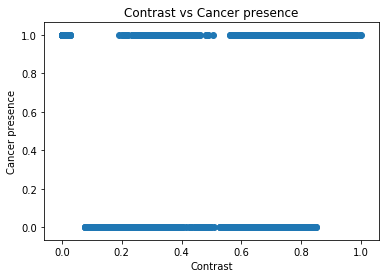

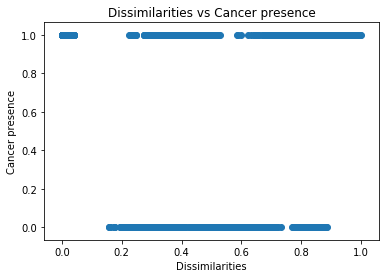

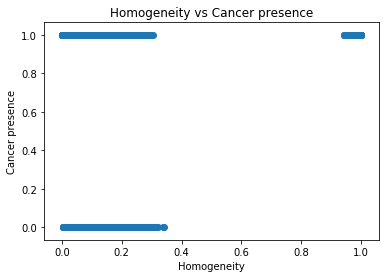

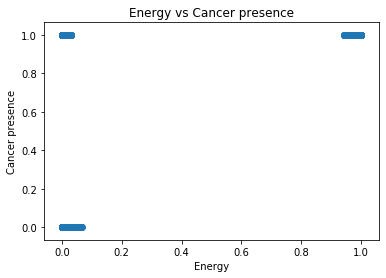

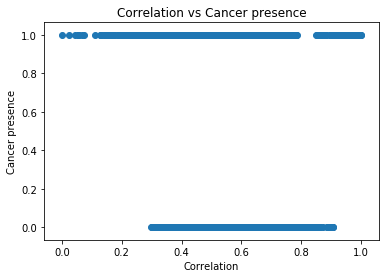

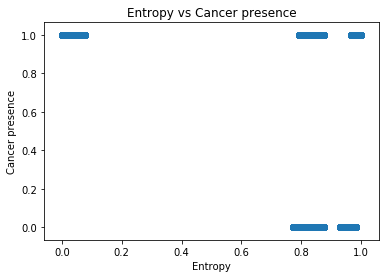

In [18]:
temp = df.columns.values.tolist()
for i in temp:
    x = df[i]
    plt.scatter(x, y)
    plt.xlabel(i)
    plt.ylabel('Cancer presence')
    plt.title('%s vs Cancer presence'%i)
    plt.show()

In [19]:
def performance_metrics(y_test, y_pred):
    print('Performance metrics:')
    print(classification_report(y_test, y_pred), '\n')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred),'\n')
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('True positive: ', tp)
    print('True negavtive: ', tn)
    print('False positive: ', fp)
    print('False negative: ', fn)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.4, random_state=0, shuffle = False)

# Logistic Regression

In [21]:
model = LogisticRegression(solver = 'liblinear', C = 0.05, 
                           multi_class = 'ovr', random_state = 0)

In [22]:
model.fit(x_train, y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [23]:
y_pred = model.predict(x_test)

In [24]:
print('Model accuracy on training set: ', model.score(x_train, y_train))

Model accuracy on training set:  0.8599311136624569


In [25]:
print('Model accuracy on testing set: ', model.score(x_test, y_test))

Model accuracy on testing set:  0.8519793459552496


In [26]:
performance_metrics(y_test, y_pred)

Performance metrics:
              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82       694
         1.0       0.91      0.84      0.87      1049

    accuracy                           0.85      1743
   macro avg       0.84      0.86      0.85      1743
weighted avg       0.86      0.85      0.85      1743
 

Confusion Matrix:
[[605  89]
 [169 880]] 

True positive:  880
True negavtive:  605
False positive:  89
False negative:  169


### False false class

In [27]:
print('Model accuracy on testing set: ', model.score(test_df, y_new_test))

Model accuracy on testing set:  0.0


# Decision Tree Algorithm

## Gini Index

In [28]:
decision_tree = DecisionTreeClassifier()

In [29]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(417.94642857142856, 875.8, 'X[2] <= 0.643\ngini = 0.476\nsamples = 2613\nvalue = [1022, 1591]'),
 Text(395.80357142857144, 815.4, 'X[0] <= 0.339\ngini = 0.492\nsamples = 1817\nvalue = [1022, 795]'),
 Text(121.78571428571428, 755.0, 'X[2] <= 0.104\ngini = 0.208\nsamples = 898\nvalue = [792, 106]'),
 Text(44.285714285714285, 694.6, 'X[2] <= 0.097\ngini = 0.014\nsamples = 561\nvalue = [557, 4]'),
 Text(22.142857142857142, 634.2, 'gini = 0.0\nsamples = 515\nvalue = [515, 0]'),
 Text(66.42857142857143, 634.2, 'X[4] <= 0.693\ngini = 0.159\nsamples = 46\nvalue = [42, 4]'),
 Text(44.285714285714285, 573.8, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(88.57142857142857, 573.8, 'gini = 0.0\nsamples = 42\nvalue = [42, 0]'),
 Text(199.28571428571428, 694.6, 'X[0] <= 0.246\ngini = 0.422\nsamples = 337\nvalue = [235, 102]'),
 Text(155.0, 634.2, 'X[0] <= 0.196\ngini = 0.071\nsamples = 189\nvalue = [182, 7]'),
 Text(132.85714285714286, 573.8, 'gini = 0.0\nsamples = 162\nvalue = [162, 0]'),


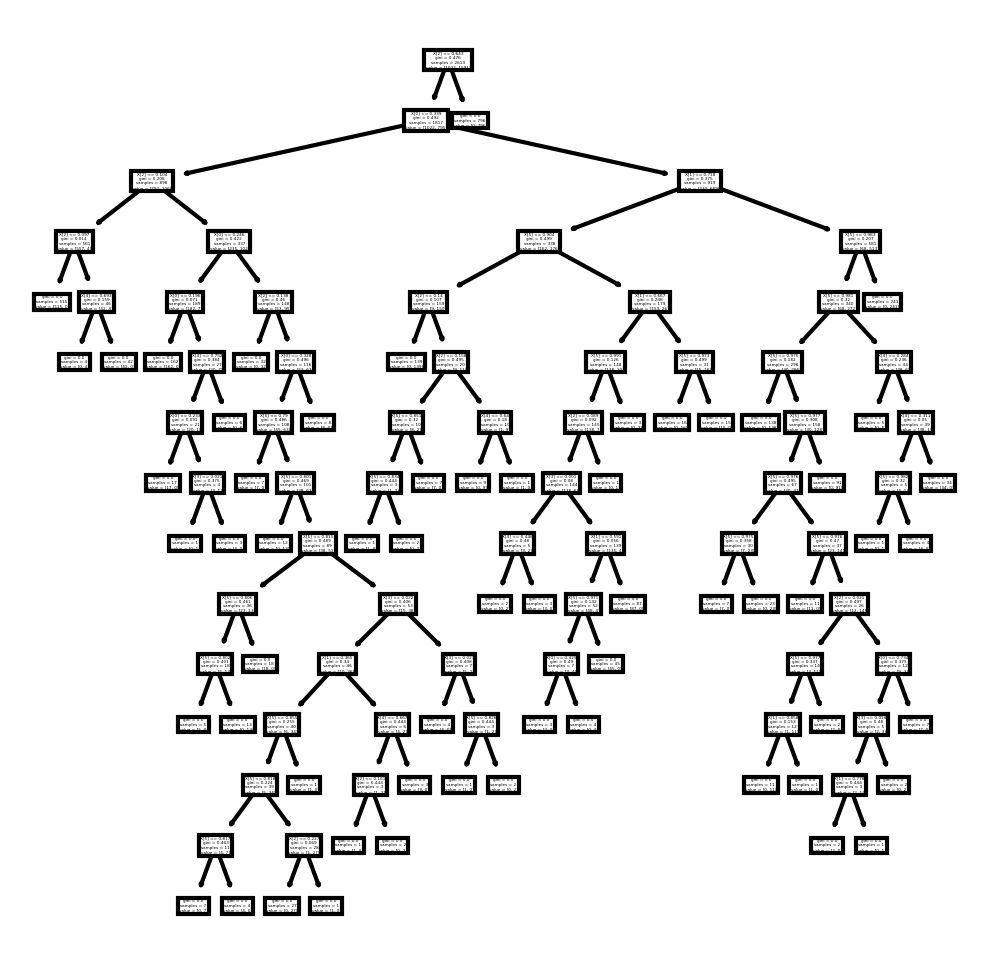

In [30]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree)

In [31]:
y_pred = decision_tree.predict(x_test)

In [32]:
print('Model accuracy on training set: ', decision_tree.score(x_train, y_train))

Model accuracy on training set:  1.0


In [33]:
print('Model accuracy on testing set: ', decision_tree.score(x_test, y_test))

Model accuracy on testing set:  0.9822145725760184


In [34]:
performance_metrics(y_test, y_pred)

Performance metrics:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       694
         1.0       0.99      0.98      0.99      1049

    accuracy                           0.98      1743
   macro avg       0.98      0.98      0.98      1743
weighted avg       0.98      0.98      0.98      1743
 

Confusion Matrix:
[[ 679   15]
 [  16 1033]] 

True positive:  1033
True negavtive:  679
False positive:  15
False negative:  16


### False false class

In [35]:
print('Model accuracy on false false set: ', decision_tree.score(test_df, y_new_test))

Model accuracy on false false set:  0.0


## Entropy

In [36]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy')

In [37]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(277.546875, 880.8333333333334, 'X[1] <= 0.099\nentropy = 0.966\nsamples = 2613\nvalue = [1022, 1591]'),
 Text(254.296875, 830.5, 'entropy = 0.0\nsamples = 796\nvalue = [0, 796]'),
 Text(300.796875, 830.5, 'X[0] <= 0.339\nentropy = 0.989\nsamples = 1817\nvalue = [1022, 795]'),
 Text(46.5, 780.1666666666666, 'X[2] <= 0.097\nentropy = 0.524\nsamples = 898\nvalue = [792, 106]'),
 Text(23.25, 729.8333333333333, 'entropy = 0.0\nsamples = 515\nvalue = [515, 0]'),
 Text(69.75, 729.8333333333333, 'X[0] <= 0.197\nentropy = 0.851\nsamples = 383\nvalue = [277, 106]'),
 Text(46.5, 679.5, 'entropy = 0.0\nsamples = 204\nvalue = [204, 0]'),
 Text(93.0, 679.5, 'X[2] <= 0.138\nentropy = 0.975\nsamples = 179\nvalue = [73, 106]'),
 Text(69.75, 629.1666666666666, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36]'),
 Text(116.25, 629.1666666666666, 'X[5] <= 0.79\nentropy = 1.0\nsamples = 143\nvalue = [73, 70]'),
 Text(93.0, 578.8333333333333, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(139.5, 5

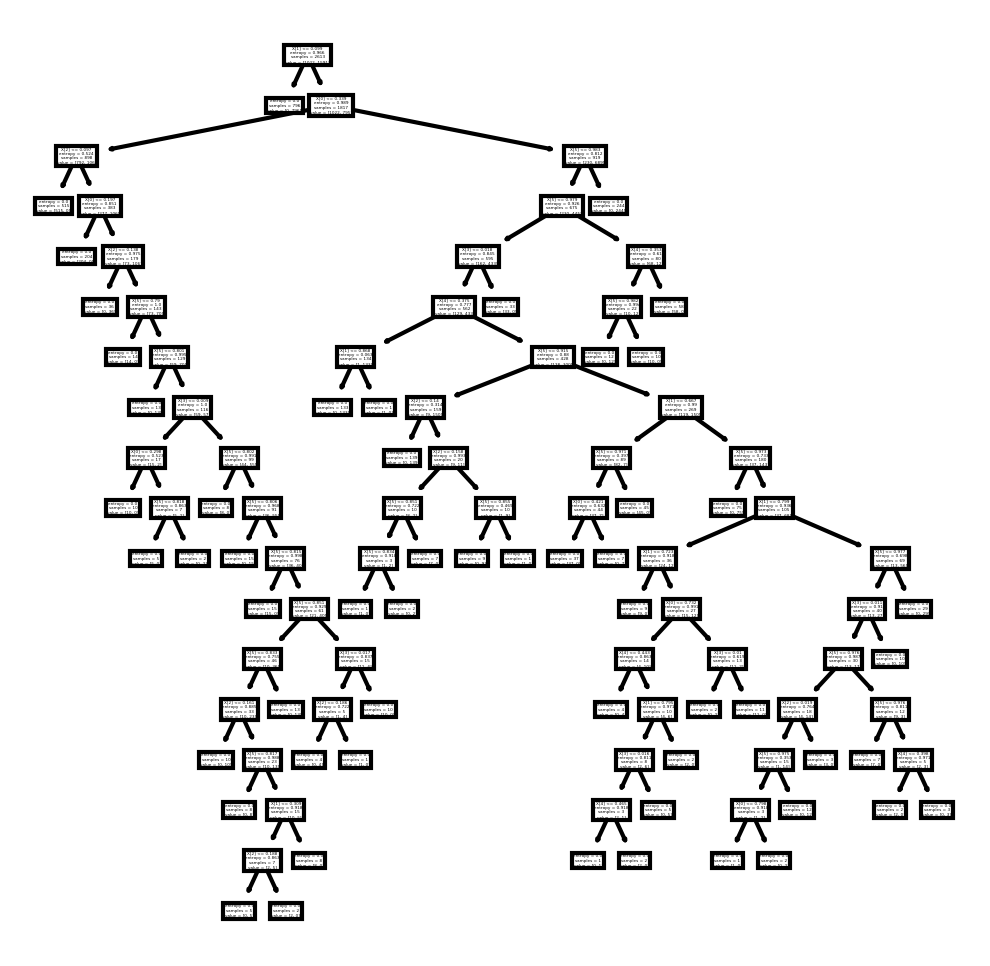

In [38]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree)

In [39]:
y_pred = decision_tree.predict(x_test)

In [40]:
print('Model accuracy on training set: ', decision_tree.score(x_train, y_train))

Model accuracy on training set:  1.0


In [41]:
print('Model accuracy on testing set: ',decision_tree.score(x_test, y_test))

Model accuracy on testing set:  0.9741824440619621


In [42]:
performance_metrics(y_test, y_pred)

Performance metrics:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       694
         1.0       0.98      0.98      0.98      1049

    accuracy                           0.97      1743
   macro avg       0.97      0.97      0.97      1743
weighted avg       0.97      0.97      0.97      1743
 

Confusion Matrix:
[[ 671   23]
 [  22 1027]] 

True positive:  1027
True negavtive:  671
False positive:  23
False negative:  22


### False false class

In [43]:
print('Model accuracy on false false set: ', decision_tree.score(test_df, y_new_test))

Model accuracy on false false set:  0.0


# Random Forest Classifier

## Gini Index

In [44]:
random_forest = RandomForestClassifier(criterion = 'gini',
                                       n_estimators = 100, 
                                       bootstrap = True,
                                       max_features = 'sqrt')

In [45]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
y_pred = random_forest.predict(x_test)

In [47]:
print('Accuracy on training data: ', random_forest.score(x_train, y_train))

Accuracy on training data:  1.0


In [48]:
print('Accuracy on testing data: ', random_forest.score(x_test, y_test))

Accuracy on testing data:  0.9707401032702238


In [49]:
performance_metrics(y_test, y_pred)

Performance metrics:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       694
         1.0       0.97      0.99      0.98      1049

    accuracy                           0.97      1743
   macro avg       0.97      0.97      0.97      1743
weighted avg       0.97      0.97      0.97      1743
 

Confusion Matrix:
[[ 658   36]
 [  15 1034]] 

True positive:  1034
True negavtive:  658
False positive:  36
False negative:  15


### False false class

In [50]:
print('Model accuracy on false false set: ', random_forest.score(test_df, y_new_test))

Model accuracy on false false set:  0.0


## Entropy

In [51]:
random_forest = RandomForestClassifier(criterion = 'entropy',
                                       n_estimators = 100, 
                                       bootstrap = True,
                                       max_features = 'sqrt')

In [52]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
y_pred = random_forest.predict(x_test)

In [54]:
print('Accuracy on training data: ', random_forest.score(x_train, y_train))

Accuracy on training data:  1.0


In [55]:
print('Accuracy on testing data: ', random_forest.score(x_test, y_test))

Accuracy on testing data:  0.9718875502008032


In [56]:
performance_metrics(y_test, y_pred)

Performance metrics:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       694
         1.0       0.97      0.99      0.98      1049

    accuracy                           0.97      1743
   macro avg       0.97      0.97      0.97      1743
weighted avg       0.97      0.97      0.97      1743
 

Confusion Matrix:
[[ 657   37]
 [  12 1037]] 

True positive:  1037
True negavtive:  657
False positive:  37
False negative:  12


### False false class

In [57]:
print('Model accuracy on false false set: ', random_forest.score(test_df, y_new_test))

Model accuracy on false false set:  0.0
